In [1]:
# Importing the packages and libraries that are required for the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import brier_score_loss
from sklearn.metrics import auc
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [2]:
# Load the datasets
train_data = pd.read_csv('train.csv',index_col=0)

train_data.drop("id",axis=1,inplace=True)

train_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
# Check for NA values 
train_data.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [4]:
# Fill the missing values
train_data["Arrival Delay in Minutes"] = train_data["Arrival Delay in Minutes"].fillna(train_data["Departure Delay in Minutes"])

In [5]:
# Seperate the data into features and lables 
X_data = train_data.iloc[:,:-1]
y_data = train_data.iloc[:,-1]

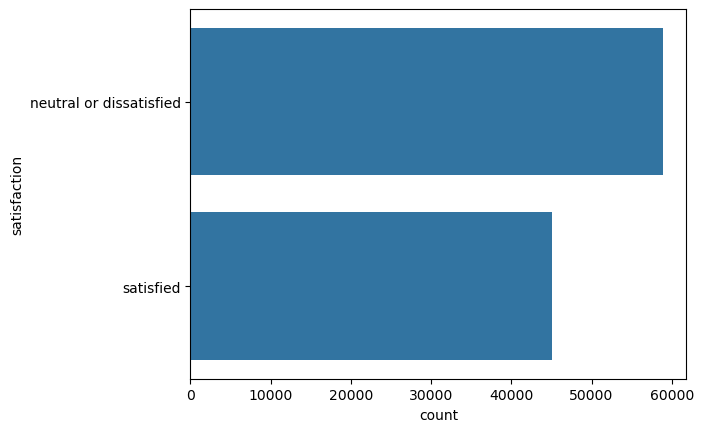

In [6]:
# Count of Labels
sns.countplot(y_data, label="Count")
plt.show()

In [7]:
# Print the object coloumns 
X_data.select_dtypes(object)

,Gender,Customer Type,Type of Travel,Class
0,Male,Loyal Customer,Personal Travel,Eco Plus
1,Male,disloyal Customer,Business travel,Business
2,Female,Loyal Customer,Business travel,Business
3,Female,Loyal Customer,Business travel,Business
4,Male,Loyal Customer,Business travel,Business
...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco
103900,Male,Loyal Customer,Business travel,Business
103901,Male,disloyal Customer,Business travel,Business
103902,Female,disloyal Customer,Business travel,Eco


In [8]:
# Print the class Categories
X_data["Class"].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [9]:
# Print the customer type Categories
X_data["Customer Type"].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [10]:
# transforming categorical coloumns into integers
X_data["Class"].replace(to_replace=['Eco Plus', 'Business', 'Eco'], value=[1,2,0], inplace=True)
X_data["Customer Type"].replace(to_replace=['Loyal Customer', 'disloyal Customer'], value=[1,-1], inplace=True)

In [11]:
# Selecting Numerical Coloumns
numerical_cols = list(X_data.select_dtypes(int).columns)

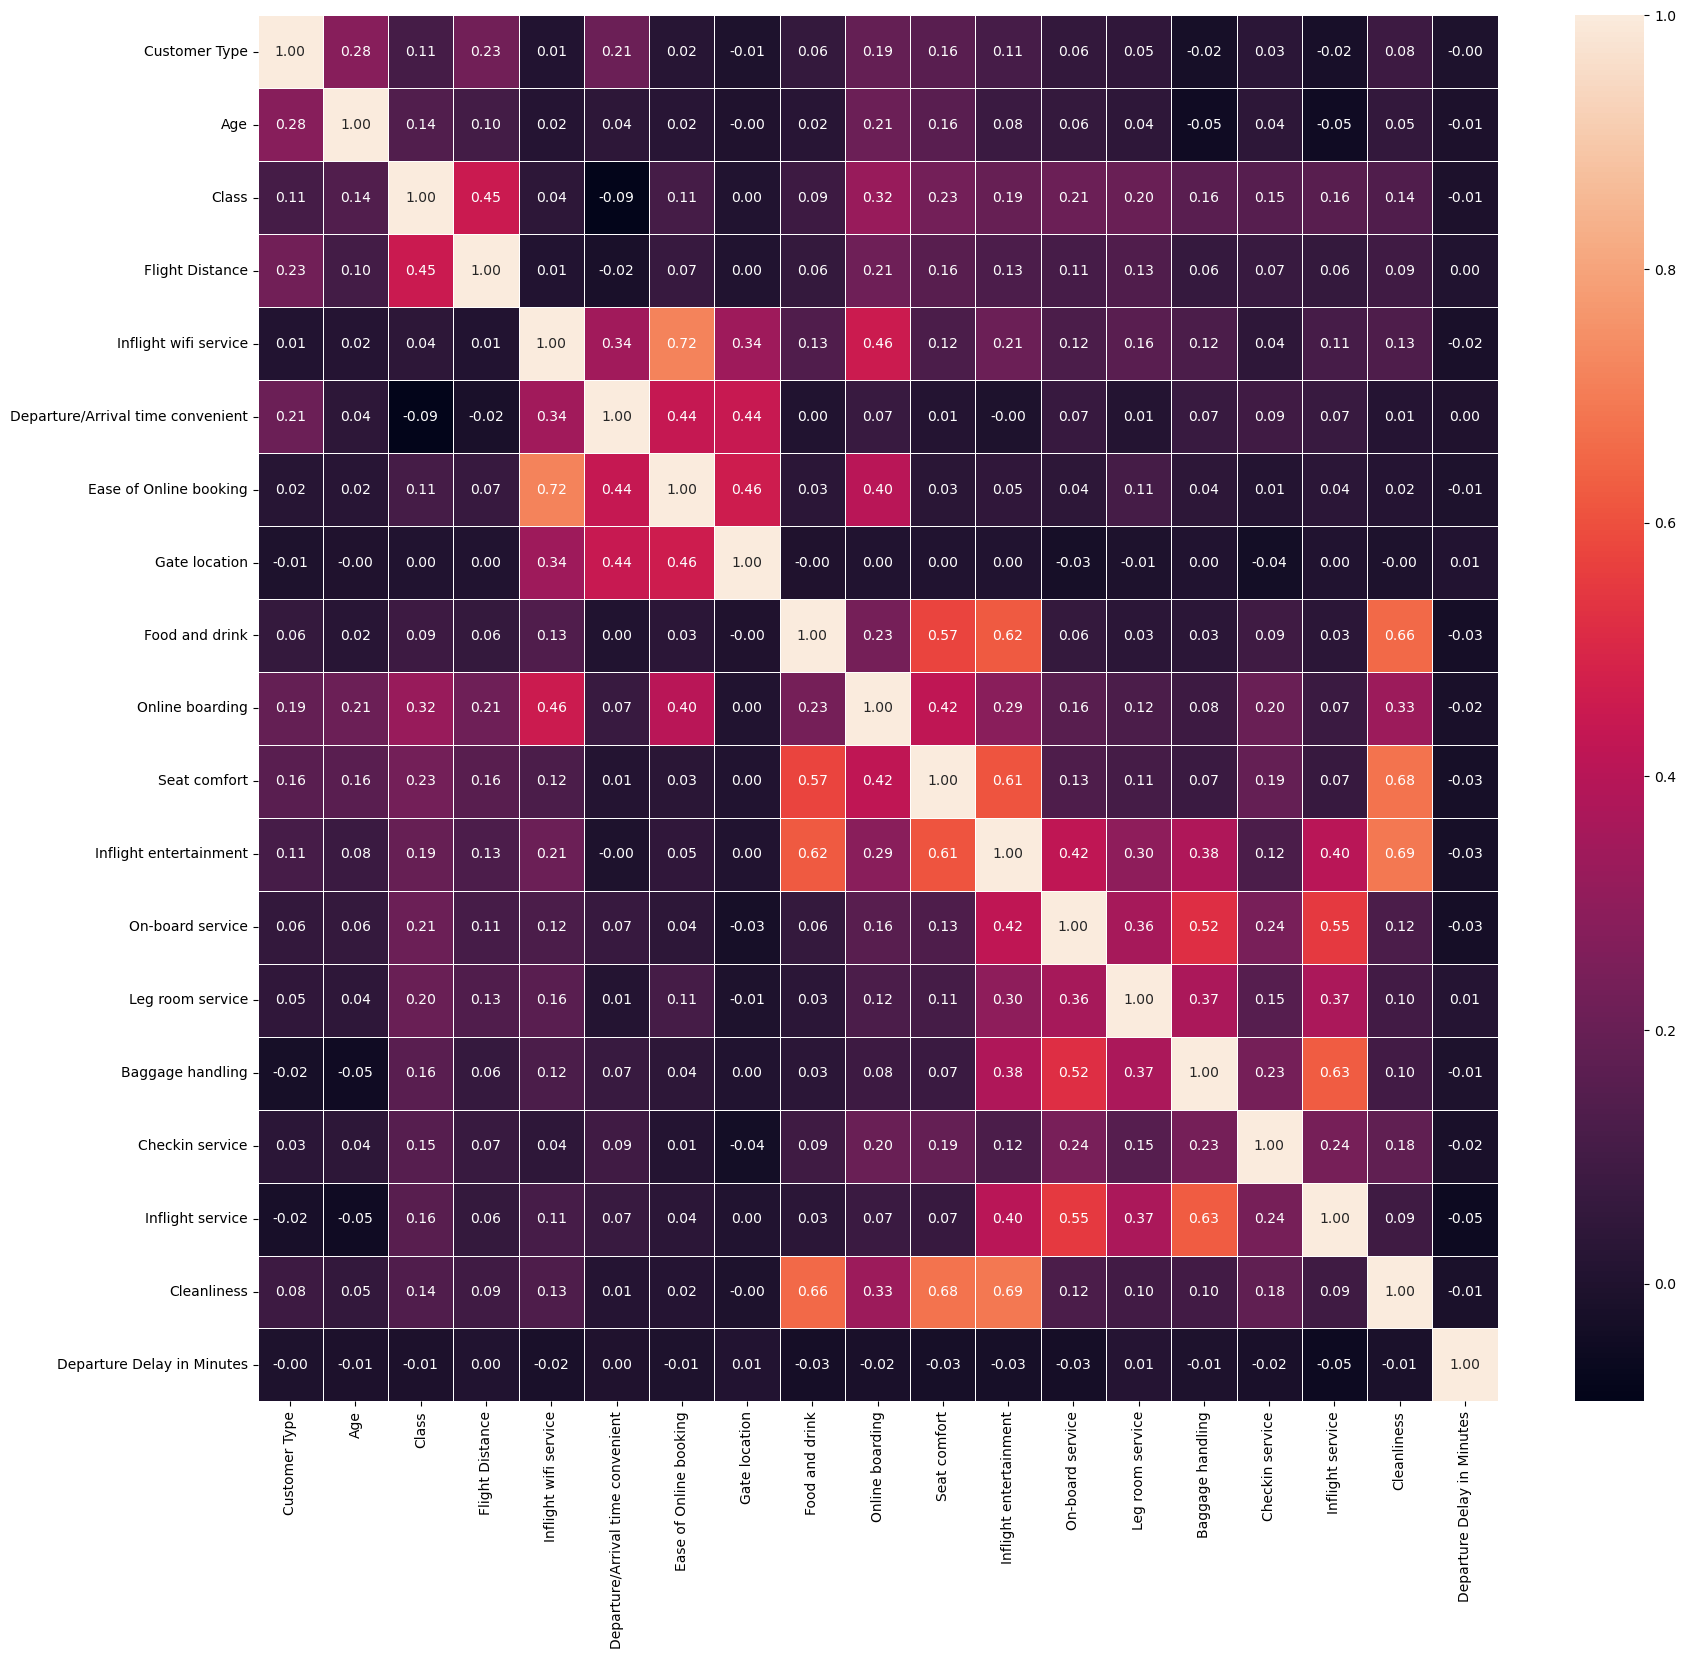

In [12]:
# Plotting Covarience matrix
fig, axis = plt.subplots(figsize=(20,18))
correlation_matrix = X_data.loc[:,numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, fmt='.2f', ax=axis)
plt.show()

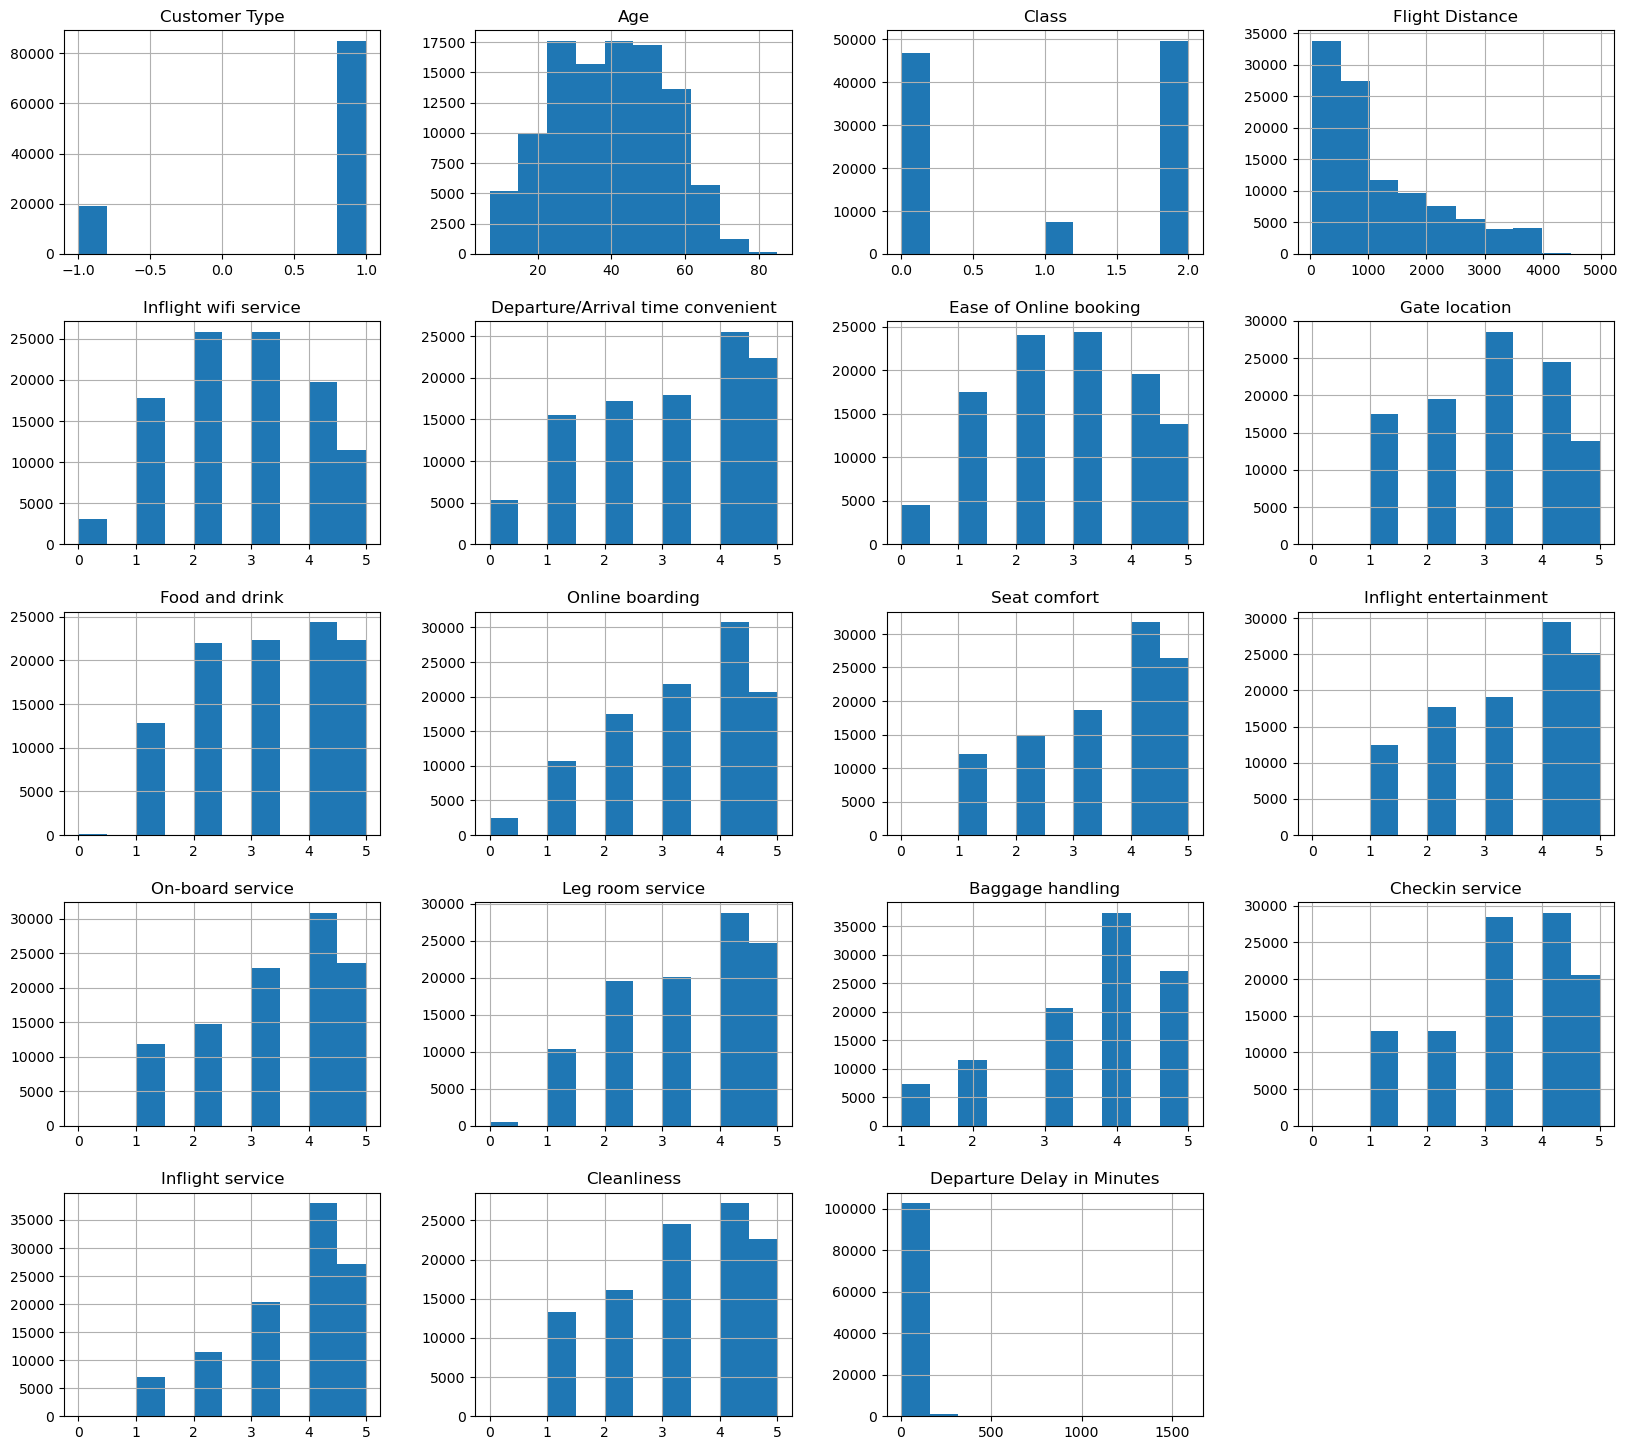

In [13]:
# histogram plots 
X_data.loc[:,numerical_cols].hist(figsize=(20, 18))
plt.show()

In [14]:
# One hot encoding 
cat_cols = ["Type of Travel","Gender"]
for col in cat_cols:
    dummies = pd.get_dummies(X_data[col])
    X_data = pd.concat([X_data, dummies], axis=1)
    X_data = X_data.drop([col], axis=1)
X_data.loc[:,X_data.select_dtypes(bool).columns] = X_data.select_dtypes(bool).astype(int)

In [15]:
# Transforming labels into integers 
y_data.replace(to_replace=['neutral or dissatisfied', 'satisfied'], value=[0,1], inplace=True)

In [16]:
# # Split the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=21, stratify=y_data)
for dataset in [X_train, X_test, y_train, y_test]:
    dataset.reset_index(drop=True, inplace=True)

In [17]:
# Scale the data 
scaler = StandardScaler()
Xs_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
Xs_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [18]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have some dataset X and y
# X: Features, y: Labels

# Example of splitting data into train and test
features_train_all, features_test_all, labels_train_all, labels_test_all = train_test_split(X_test,y_test, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
features_train_all_std = scaler.fit_transform(features_train_all)
features_test_all_std = scaler.transform(features_test_all)


In [19]:
Xs_train.describe()

,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Business travel,Personal Travel,Female,Male
count,9.351300e+04,9.351300e+04,9.351300e+04,9.351300e+04,9.351300e+04,9.351300e+04,9.351300e+04,9.351300e+04,9.351300e+04,9.351300e+04,...,9.351300e+04,9.351300e+04,9.351300e+04,9.351300e+04,9.351300e+04,9.351300e+04,9.351300e+04,9.351300e+04,9.351300e+04,9.351300e+04
mean,1.884386e-17,1.273480e-16,-1.133291e-16,9.361144e-17,4.558999e-18,7.408373e-17,8.601311e-17,1.595650e-17,9.771454e-17,-6.990465e-18,...,5.630363e-17,-2.849374e-17,1.392774e-16,-1.920858e-16,2.397273e-17,3.707986e-17,1.809922e-16,3.886546e-17,1.113915e-16,-7.476758e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-2.115798e+00,-2.143693e+00,-1.067735e+00,-1.162595e+00,-2.058825e+00,-2.010726e+00,-1.975142e+00,-2.327296e+00,-2.408186e+00,-2.412999e+00,...,-2.229092e+00,-2.612438e+00,-3.094021e+00,-2.504506e+00,-3.861108e-01,-3.913214e-01,-1.488825e+00,-6.716706e-01,-1.013100e+00,-9.870694e-01
25%,4.726348e-01,-8.201625e-01,-1.067735e+00,-7.783889e-01,-5.515468e-01,-6.980271e-01,-5.435699e-01,-7.632771e-01,-9.041120e-01,-9.286077e-01,...,-5.356370e-01,-2.415978e-01,-5.445032e-01,-9.808671e-01,-3.861108e-01,-3.913214e-01,-1.488825e+00,-6.716706e-01,-1.013100e+00,-9.870694e-01
50%,4.726348e-01,4.013206e-02,-2.901350e-02,-3.470348e-01,2.020922e-01,-4.167766e-02,1.722164e-01,1.873216e-02,-1.520753e-01,-1.864120e-01,...,3.110907e-01,-2.415978e-01,3.053362e-01,-2.190476e-01,-3.861108e-01,-3.913214e-01,6.716706e-01,-6.716706e-01,9.870694e-01,-9.870694e-01
75%,4.726348e-01,7.680736e-01,1.009708e+00,5.557996e-01,9.557313e-01,6.146718e-01,8.880028e-01,8.007414e-01,5.999615e-01,5.557836e-01,...,1.157818e+00,5.486825e-01,1.155176e+00,5.427718e-01,-7.557015e-02,-5.985105e-02,6.716706e-01,1.488825e+00,9.870694e-01,1.013100e+00
max,4.726348e-01,3.018075e+00,1.009708e+00,3.805000e+00,1.709370e+00,1.271021e+00,1.603789e+00,1.582751e+00,1.351998e+00,1.297979e+00,...,1.157818e+00,1.338963e+00,1.155176e+00,1.304591e+00,4.081228e+01,3.999706e+01,6.716706e-01,1.488825e+00,9.870694e-01,1.013100e+00


In [20]:
# funtion to calculate Metrics
def calc_metrics(confusion_matrix):
    TP, FN = confusion_matrix[0][0], confusion_matrix[0][1]
    FP, TN = confusion_matrix[1][0], confusion_matrix[1][1]
    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    FPR = FP / (TN + FP)
    FNR = FN / (TP + FN)
    Precision = TP / (TP + FP)
    F1_measure = 2 * TP / (2 * TP + FP + FN)
    Accuracy = (TP + TN) / (TP + FP + FN + TN)
    Error_rate = (FP + FN) / (TP + FP + FN + TN)
    BACC = (TPR + TNR) / 2
    TSS = TPR - FPR
    HSS = 2 * (TP * TN - FP * FN) / ((TP + FN) * (FN + TN) + (TP + FP) * (FP + TN))
    metrics = [TP, TN, FP, FN, TPR, TNR, FPR, FNR, Precision, F1_measure, Accuracy, Error_rate, BACC, TSS, HSS]
    return metrics

In [21]:
# Train the model and return the Metrics
def get_metrics(model, X_train, X_test, y_train, y_test, LSTM_flag):
    metrics = []
    if LSTM_flag == 1:
        Xtrain, Xtest, ytrain, ytest = map(np.array, [X_train, X_test, y_train, y_test])
        shape = Xtrain.shape
        Xtrain_reshaped = Xtrain.reshape(len(Xtrain), shape[1], 1)
        Xtest_reshaped = Xtest.reshape(len(Xtest), shape[1], 1)
        model.fit(Xtrain_reshaped, ytrain, epochs=50,validation_data=(Xtest_reshaped, ytest), verbose=0)
        lstm_scores = model.evaluate(Xtest_reshaped, ytest, verbose=0)
        predict_prob = model.predict(Xtest_reshaped)
        pred_labels = predict_prob > 0.5
        pred_labels_1 = pred_labels.astype(int)
        matrix = confusion_matrix(ytest, pred_labels_1, labels=[1, 0])
        lstm_brier_score = brier_score_loss(ytest, predict_prob)
        lstm_roc_auc = roc_auc_score(ytest, predict_prob)
        metrics.extend(calc_metrics(matrix))
        metrics.extend([lstm_brier_score, lstm_roc_auc, lstm_scores[1]])
    elif LSTM_flag == 0:
        model.fit(X_train, y_train)
        predicted = model.predict(X_test)
        matrix = confusion_matrix(y_test, predicted, labels=[1, 0])
        model_brier_score = brier_score_loss(y_test, model.predict_proba(X_test)[:, 1])
        model_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        metrics.extend(calc_metrics(matrix))
        metrics.extend([model_brier_score, model_roc_auc, model.score(X_test, y_test)])
    return metrics


In [22]:
# Parameter tuning for KNN Algorithm

from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Define the KNN model
knn = KNeighborsClassifier()
# Use only a subset  of the training data for hyperparameter tuning beacuse the data is huge and required more time for tuning 
X_train_subset = X_train.sample(frac=0.1, random_state=42)
y_train_subset = y_train[X_train_subset.index]

# Set up the parameter grid with fewer values
param_dist_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree']
}

# Perform randomized search (instead of grid search) with 5 iterations and 10-fold cross-validation
random_search_knn = RandomizedSearchCV(knn, param_dist_knn, n_iter=5, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)
random_search_knn.fit(X_train_subset, y_train_subset)

# Print the best parameters and best score
print("Best KNN parameters:", random_search_knn.best_params_)
print("Best KNN score:", random_search_knn.best_score_)


Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best KNN parameters: {'weights': 'distance', 'n_neighbors': 9, 'algorithm': 'auto'}
Best KNN score: 0.6739422505598975


In [23]:
# Parameter tuning for Random Forest

from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)
# Use only a subset  of the training data for hyperparameter tuning beacuse the data is huge and required more time for tuning 
X_train_subset = X_train.sample(frac=0.1, random_state=42)
y_train_subset = y_train[X_train_subset.index]

# Set up the parameter grid with fewer values
param_dist_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform randomized search with 5 iterations and 10-fold cross-validation
random_search_rf = RandomizedSearchCV(rf, param_dist_rf, n_iter=5, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)
random_search_rf.fit(X_train_subset, y_train_subset)

# Print the best parameters and best score
print("Best Random Forest parameters:", random_search_rf.best_params_)
print("Best Random Forest score:", random_search_rf.best_score_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best Random Forest parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
Best Random Forest score: 0.9493106403400521


In [24]:
# Parameter tuning for SVM

from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Assuming your data is already loaded as X_train, y_train

# Scale the data (SVM is sensitive to the scale of data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Use only a subset  of the training data for hyperparameter tuning beacuse the data is huge and required more time for tuning 
X_train_subset = X_train.sample(frac=0.1, random_state=42)  
y_train_subset = y_train[X_train_subset.index]

# Initialize LinearSVC for linear classification problems
svm = LinearSVC(C=1.0, max_iter=1000, dual=False)  # Remove n_jobs

# Define a smaller parameter grid for hyperparameter tuning
param_dist = {
    'C': [0.1, 1.0, 10.0],  # Fewer values for C
}

# Use RandomizedSearchCV with fewer iterations to reduce time
random_search = RandomizedSearchCV(svm, param_dist, n_iter=5, cv=10, scoring='accuracy', verbose=1)

# Fit the model
random_search.fit(X_train_subset, y_train_subset)

# Print the best parameters found during the search
print(f"Best Parameters: {random_search.best_params_}")

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Best Parameters: {'C': 0.1}


In [25]:
from sklearn.model_selection import StratifiedKFold

# Define Stratified K-Fold cross-validator
cv_stratified = StratifiedKFold(n_splits=10, shuffle=True, random_state=21)

In [26]:
 # Compare Classifiers using 10-Fold Stratified Cross-Validation

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, brier_score_loss, roc_auc_score
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define Stratified K-Fold cross-validator
cv_stratified = StratifiedKFold(n_splits=10, shuffle=True, random_state=21)

# Metric columns
metric_columns = ['TP', 'TN', 'FP', 'FN', 'TPR', 'TNR', 'FPR', 'FNR', 'Precision', 
                  'F1_measure', 'Accuracy', 'Error_rate', 'BACC', 'TSS', 'HSS', 
                  'Brier_score', 'AUC', 'Acc_by_package_fn']

# Initialize metrics lists for each algorithm
knn_metrics_list, rf_metrics_list, svm_metrics_list, lstm_metrics_list = [], [], [], []

# Set up parameter for SVM
C = 1.0

# Assuming random_search_knn and random_search_rf have been already defined, here is how to use them
# 10 iterations of 10-fold cross-validation
for iter_num, (train_index, test_index) in enumerate(cv_stratified.split(features_train_all_std, labels_train_all), start=1):
    
    # Get KNN best parameters from random search (assuming you already performed RandomizedSearchCV or GridSearchCV)
    knn_params = random_search_knn.best_params_
    
    # KNN Model with correct parameters
    knn_model = KNeighborsClassifier(n_neighbors=knn_params['n_neighbors'],
                                     weights=knn_params['weights'],
                                     algorithm=knn_params['algorithm'])
    
    # Random Forest Model (assuming random_search_rf.best_params_ works similarly)
    rf_params = random_search_rf.best_params_
    rf_model = RandomForestClassifier(min_samples_split=rf_params['min_samples_split'])
    
    # SVM Classifier Model
    svm_model = SVC(C=C, kernel='linear', probability=True)
    
    # LSTM Model
    lstm_model = Sequential()
    lstm_model.add(LSTM(64, activation='relu', input_shape=(8, 1), return_sequences=False))  # Correct input shape
    lstm_model.add(Dense(1, activation='sigmoid'))
    lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Split data into training and testing sets
    # Convert numpy arrays to pandas DataFrame/Series if they are numpy arrays
    features_train_all_std = pd.DataFrame(features_train_all_std)  # Convert features to DataFrame
    labels_train_all = pd.Series(labels_train_all)  # Convert labels to Series

    features_train, features_test = features_train_all_std.iloc[train_index, :], features_train_all_std.iloc[test_index, :]
    labels_train, labels_test = labels_train_all.iloc[train_index], labels_train_all.iloc[test_index]  # Use iloc for labels
    
    # Get metrics for each algorithm
    knn_metrics = get_metrics(knn_model, features_train, features_test, labels_train, labels_test, 0)
    rf_metrics = get_metrics(rf_model, features_train, features_test, labels_train, labels_test, 0)
    svm_metrics = get_metrics(svm_model, features_train, features_test, labels_train, labels_test, 0)
    lstm_metrics = get_metrics(lstm_model, features_train, features_test, labels_train, labels_test, 1)
    
    # Append metrics to respective lists
    knn_metrics_list.append(knn_metrics)
    rf_metrics_list.append(rf_metrics)
    svm_metrics_list.append(svm_metrics)
    lstm_metrics_list.append(lstm_metrics)
    
    # Create a DataFrame for all metrics in this iteration
    metrics_all_df = pd.DataFrame([knn_metrics, rf_metrics, svm_metrics, lstm_metrics],
                                  columns=metric_columns, index=['KNN', 'RF', 'SVM', 'LSTM'])
    
    # Display metrics for all algorithms in this iteration
    print('\nIteration {}: \n'.format(iter_num))
    print('----- Metrics for all Algorithms in Iteration {} -----\n'.format(iter_num))
    print(metrics_all_df.round(decimals=2).T)
    print('\n')

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Iteration 1: 

----- Metrics for all Algorithms in Iteration 1 -----

                      KNN      RF     SVM    LSTM
TP                 306.00  337.00  297.00  316.00
TN                 456.00  448.00  431.00  460.00
FP                  16.00   24.00   41.00   12.00
FN                  54.00   23.00   63.00   44.00
TPR                  0.85    0.94    0.82    0.88
TNR                  0.97    0.95    0.91    0.97
FPR                  0.03    0.05    0.09    0.03
FNR                  0.15    0.06    0.18    0.12
Precision            0.95    0.93    0.88    0.96
F1_measure           0.90    0.93    0.85    0.92
Accuracy             0.92    0.94    0.88    0.93
Error_rate           0.08    0.06    0.12    0.07
BACC                 0.91    0.94    0.87    0.93
TSS                  0.82    0.89    0.74    0.85
HSS                  0.83    0.88    0.74    0.86
Brier_score          0.07    0.04    0.10    0.05
AUC                  0.96    0.99    0.9

In [27]:
# Initialize Metric Index for Iterations

metric_index_df = ['iter1', 'iter2', 'iter3', 'iter4', 'iter5', 'iter6', 'iter7', 'iter8', 'iter9', 'iter10']

knn_metrics_df = pd.DataFrame(knn_metrics_list, columns=metric_columns, index=metric_index_df)
rf_metrics_df = pd.DataFrame(rf_metrics_list, columns=metric_columns, index=metric_index_df)
svm_metrics_df = pd.DataFrame(svm_metrics_list, columns=metric_columns, index=metric_index_df)
lstm_metrics_df = pd.DataFrame(lstm_metrics_list, columns=metric_columns, index=metric_index_df)

for i, metrics_df in enumerate([knn_metrics_df, rf_metrics_df, svm_metrics_df, lstm_metrics_df], start=1):
    print('\nMetrics for Algorithm {}:\n'.format(i))
    print(metrics_df.round(decimals=2).T)
    print('\n')


Metrics for Algorithm 1:

                    iter1   iter2   iter3   iter4   iter5   iter6   iter7  \
TP                 306.00  304.00  309.00  302.00  306.00  308.00  299.00   
TN                 456.00  454.00  450.00  456.00  446.00  449.00  458.00   
FP                  16.00   18.00   22.00   16.00   25.00   22.00   13.00   
FN                  54.00   56.00   50.00   57.00   54.00   52.00   61.00   
TPR                  0.85    0.84    0.86    0.84    0.85    0.86    0.83   
TNR                  0.97    0.96    0.95    0.97    0.95    0.95    0.97   
FPR                  0.03    0.04    0.05    0.03    0.05    0.05    0.03   
FNR                  0.15    0.16    0.14    0.16    0.15    0.14    0.17   
Precision            0.95    0.94    0.93    0.95    0.92    0.93    0.96   
F1_measure           0.90    0.89    0.90    0.89    0.89    0.89    0.89   
Accuracy             0.92    0.91    0.91    0.91    0.90    0.91    0.91   
Error_rate           0.08    0.09    0.09    0.09

In [28]:
# Calculate the average metrics for each algorithm

import pandas as pd

# Define the metric columns
metric_columns = ['TP', 'TN', 'FP', 'FN', 'TPR', 'TNR', 'FPR', 'FNR', 'Precision', 
                  'F1_measure', 'Accuracy', 'Error_rate', 'BACC', 'TSS', 'HSS', 
                  'Brier_score', 'AUC', 'Acc_by_package_fn']

# Initialize DataFrames to collect metrics for each algorithm
knn_metrics_df = pd.DataFrame(columns=metric_columns)
rf_metrics_df = pd.DataFrame(columns=metric_columns)
svm_metrics_df = pd.DataFrame(columns=metric_columns)
lstm_metrics_df = pd.DataFrame(columns=metric_columns)

# Assuming you already have the cross-validation loop here
for iter_num, (train_index, test_index) in enumerate(cv_stratified.split(features_train_all_std, labels_train_all), start=1):
    
    # Your model training and metric collection code here...
    
    # After getting metrics for each model (knn_metrics, rf_metrics, svm_metrics, lstm_metrics)
    
    # Use pd.concat to append metrics as a new row in the DataFrame
    knn_metrics_df = pd.concat([knn_metrics_df, pd.Series(knn_metrics, index=metric_columns).to_frame().T], ignore_index=True)
    rf_metrics_df = pd.concat([rf_metrics_df, pd.Series(rf_metrics, index=metric_columns).to_frame().T], ignore_index=True)
    svm_metrics_df = pd.concat([svm_metrics_df, pd.Series(svm_metrics, index=metric_columns).to_frame().T], ignore_index=True)
    lstm_metrics_df = pd.concat([lstm_metrics_df, pd.Series(lstm_metrics, index=metric_columns).to_frame().T], ignore_index=True)

# After collecting all the metrics for each model across all iterations
# Calculate the average of each metric for each algorithm
knn_avg_df = knn_metrics_df.mean()
rf_avg_df = rf_metrics_df.mean()
svm_avg_df = svm_metrics_df.mean()
lstm_avg_df = lstm_metrics_df.mean()

# Create a DataFrame with the average performance for each algorithm
avg_performance_df = pd.DataFrame({'KNN': knn_avg_df, 'RF': rf_avg_df, 'SVM': svm_avg_df, 'LSTM': lstm_avg_df}, index=metric_columns)

# Display the average performance for each algorithm
print(avg_performance_df.round(decimals=2))

                      KNN      RF     SVM    LSTM
TP                 291.00  332.00  292.00  325.00
TN                 455.00  456.00  435.00  442.00
FP                  16.00   15.00   36.00   29.00
FN                  69.00   28.00   68.00   35.00
TPR                  0.81    0.92    0.81    0.90
TNR                  0.97    0.97    0.92    0.94
FPR                  0.03    0.03    0.08    0.06
FNR                  0.19    0.08    0.19    0.10
Precision            0.95    0.96    0.89    0.92
F1_measure           0.87    0.94    0.85    0.91
Accuracy             0.90    0.95    0.87    0.92
Error_rate           0.10    0.05    0.13    0.08
BACC                 0.89    0.95    0.87    0.92
TSS                  0.77    0.89    0.73    0.84
HSS                  0.79    0.89    0.74    0.84
Brier_score          0.08    0.04    0.10    0.06
AUC                  0.96    0.99    0.93    0.98
Acc_by_package_fn    0.90    0.95    0.87    0.92


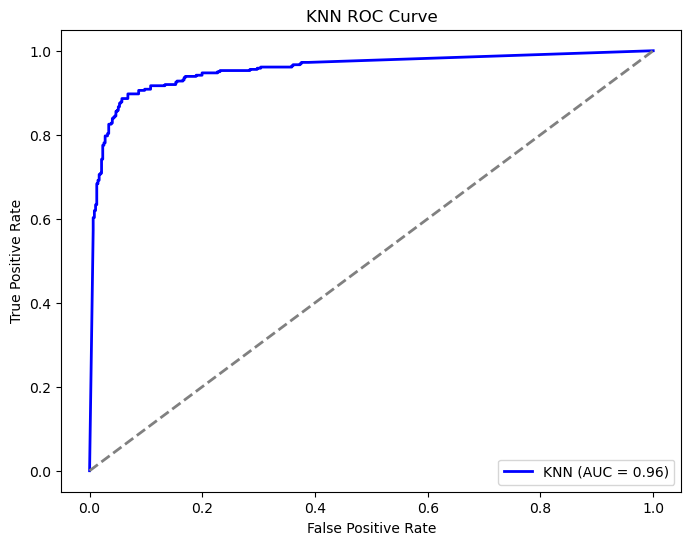

KNN AUC: 0.96


In [29]:
#Evaluating the performance of various algorithms by comparing their ROC curves and AUC scores on the test dataset.

# Implementing roc curves and AOC Score for KNN
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for KNN
knn_probs = knn_model.predict_proba(features_test)[:, 1]  # Probability for class 1

# Calculate ROC curve for KNN
fpr_knn, tpr_knn, _ = roc_curve(labels_test, knn_probs)

# Calculate AUC for KNN
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve for KNN
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='KNN (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Chance level
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC for KNN
print(f"KNN AUC: {roc_auc_knn:.2f}")

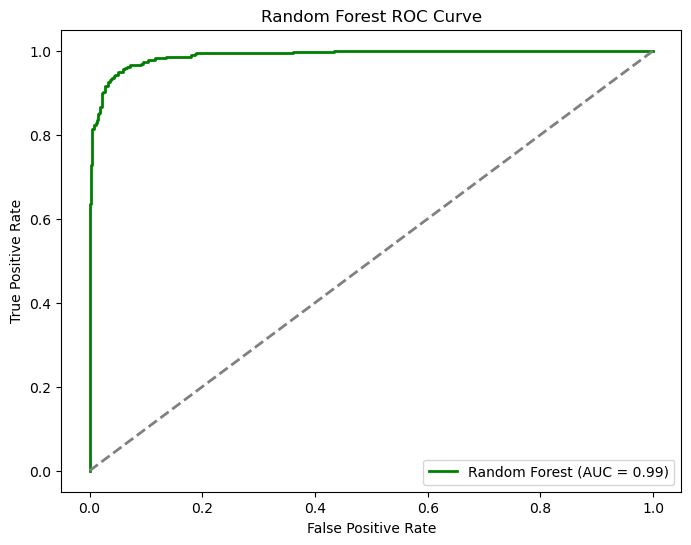

Random Forest AUC: 0.99


In [30]:
# Implementing roc curves and AOC Score for Random Forest

# Get predicted probabilities for Random Forest
rf_probs = rf_model.predict_proba(features_test)[:, 1]  # Probability for class 1

# Calculate ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(labels_test, rf_probs)

# Calculate AUC for Random Forest
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Chance level
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC for Random Forest
print(f"Random Forest AUC: {roc_auc_rf:.2f}")

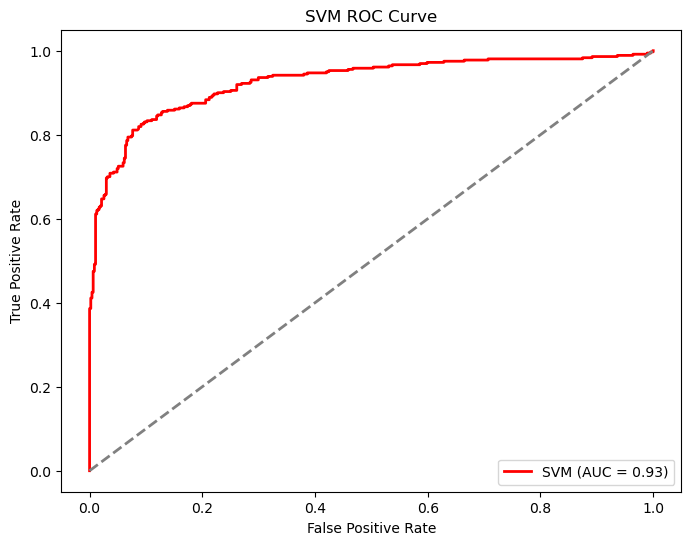

SVM AUC: 0.93


In [31]:
# Implementing roc curves and AOC Score for SVM

# Get predicted probabilities for SVM
svm_probs = svm_model.predict_proba(features_test)[:, 1]  # Probability for class 1

# Calculate ROC curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(labels_test, svm_probs)

# Calculate AUC for SVM
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM (AUC = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Chance level
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC for SVM
print(f"SVM AUC: {roc_auc_svm:.2f}")

Epoch 1/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7436 - loss: 0.5825
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7950 - loss: 0.4658
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8142 - loss: 0.4218
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8638 - loss: 0.3399
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8750 - loss: 0.3183
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8864 - loss: 0.2875
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8882 - loss: 0.2808
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8963 - loss: 0.2635
Epoch 9/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8997 - loss: 0.2657
Epoch 10/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9048 - loss: 0.2544
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


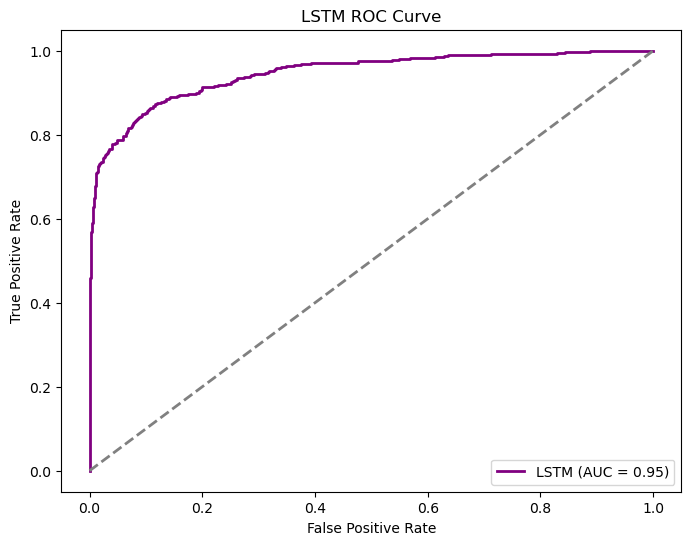

LSTM AUC: 0.95


In [72]:
#  Implementing roc curves and AOC Score for LSTM

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Split the data once (you can also use train_test_split here, but assuming you're using your pre-split data)
# Use indices or a direct split for training and testing data
train_size = int(0.8 * len(features_train_all_std))  # 80% for training, 20% for testing
features_train = features_train_all_std[:train_size]
labels_train = labels_train_all[:train_size]
features_test = features_train_all_std[train_size:]
labels_test = labels_train_all[train_size:]

# Reshape the data for LSTM (3D format)
features_train_lstm = features_train.values.reshape(features_train.shape[0], features_train.shape[1], 1)
features_test_lstm = features_test.values.reshape(features_test.shape[0], features_test.shape[1], 1)

# Initialize your LSTM model (Ensure it's correctly built as in the previous steps)
lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='relu', input_shape=(features_train_lstm.shape[1], 1), return_sequences=False))  # Shape (samples, features, 1)
lstm_model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
lstm_model.fit(features_train_lstm, labels_train, epochs=10, batch_size=32, verbose=1)

# Get predicted probabilities for LSTM (for binary classification, this is the probability for class 1)
lstm_probs = lstm_model.predict(features_test_lstm)

# Calculate ROC curve
fpr_lstm, tpr_lstm, _ = roc_curve(labels_test, lstm_probs)

# Calculate AUC for LSTM
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

# Plot ROC curve for LSTM
plt.figure(figsize=(8, 6))
plt.plot(fpr_lstm, tpr_lstm, color='purple', lw=2, label='LSTM (AUC = {:.2f})'.format(roc_auc_lstm))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Chance level
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LSTM ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC for LSTM
print(f"LSTM AUC: {roc_auc_lstm:.2f}")

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


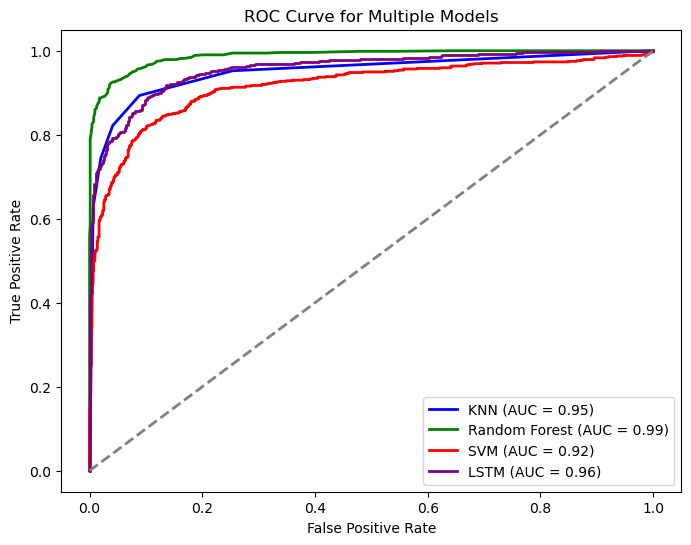

In [33]:
# Plotting ROC Curves for All Models 

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Initialize models
knn_model = KNeighborsClassifier(n_neighbors=5)  # Replace with best parameters
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Replace with best parameters
svm_model = SVC(kernel='linear', probability=True, random_state=42)  # SVM with probability output

# Initialize LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='relu', input_shape=(features_train_lstm.shape[1], 1), return_sequences=False))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train models
knn_model.fit(features_train, labels_train)
rf_model.fit(features_train, labels_train)
svm_model.fit(features_train, labels_train)
lstm_model.fit(features_train_lstm, labels_train, epochs=10, batch_size=32, verbose=0)

# Get predicted probabilities for each model
knn_probs = knn_model.predict_proba(features_test)[:, 1]  # Probability for class 1
rf_probs = rf_model.predict_proba(features_test)[:, 1]  # Probability for class 1
svm_probs = svm_model.predict_proba(features_test)[:, 1]  # Probability for class 1
lstm_probs = lstm_model.predict(features_test_lstm)  # Probability for class 1

# Calculate ROC curve for each model
fpr_knn, tpr_knn, _ = roc_curve(labels_test, knn_probs)
fpr_rf, tpr_rf, _ = roc_curve(labels_test, rf_probs)
fpr_svm, tpr_svm, _ = roc_curve(labels_test, svm_probs)
fpr_lstm, tpr_lstm, _ = roc_curve(labels_test, lstm_probs)

# Calculate AUC for each model
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

# Plot ROC curve for all models
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='KNN (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM (AUC = {:.2f})'.format(roc_auc_svm))
plt.plot(fpr_lstm, tpr_lstm, color='purple', lw=2, label='LSTM (AUC = {:.2f})'.format(roc_auc_lstm))

# Plot chance line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Formatting the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiple Models')
plt.legend(loc='lower right')
plt.show()

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


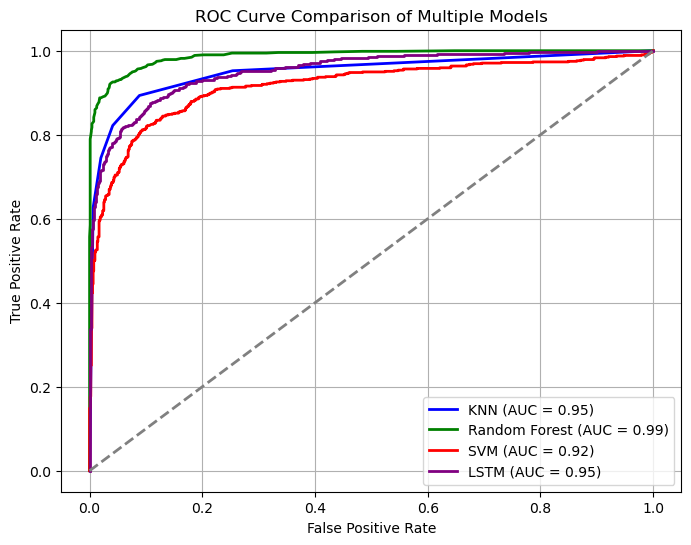

In [34]:
# Comparing All Models

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Initialize models
knn_model = KNeighborsClassifier(n_neighbors=5)  # Replace with best parameters
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Replace with best parameters
svm_model = SVC(kernel='linear', probability=True, random_state=42)  # SVM with probability output

# Initialize LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='relu', input_shape=(features_train_lstm.shape[1], 1), return_sequences=False))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train models
knn_model.fit(features_train, labels_train)
rf_model.fit(features_train, labels_train)
svm_model.fit(features_train, labels_train)
lstm_model.fit(features_train_lstm, labels_train, epochs=10, batch_size=32, verbose=0)

# Get predicted probabilities for each model
knn_probs = knn_model.predict_proba(features_test)[:, 1]  # Probability for class 1
rf_probs = rf_model.predict_proba(features_test)[:, 1]  # Probability for class 1
svm_probs = svm_model.predict_proba(features_test)[:, 1]  # Probability for class 1
lstm_probs = lstm_model.predict(features_test_lstm)  # Probability for class 1

# Calculate ROC curve for each model
fpr_knn, tpr_knn, _ = roc_curve(labels_test, knn_probs)
fpr_rf, tpr_rf, _ = roc_curve(labels_test, rf_probs)
fpr_svm, tpr_svm, _ = roc_curve(labels_test, svm_probs)
fpr_lstm, tpr_lstm, _ = roc_curve(labels_test, lstm_probs)

# Calculate AUC for each model
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

# Plot ROC curve for all models
plt.figure(figsize=(8, 6))

# Plot each model's ROC curve with respective AUC score
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='KNN (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM (AUC = {:.2f})'.format(roc_auc_svm))
plt.plot(fpr_lstm, tpr_lstm, color='purple', lw=2, label='LSTM (AUC = {:.2f})'.format(roc_auc_lstm))

# Plot chance line (diagonal line)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Formatting the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Multiple Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [35]:
# Assuming 'avg_performance_df' has already been calculated from the earlier step

print(avg_performance_df.round(decimals=2))
print('\n')

                      KNN      RF     SVM    LSTM
TP                 291.00  332.00  292.00  325.00
TN                 455.00  456.00  435.00  442.00
FP                  16.00   15.00   36.00   29.00
FN                  69.00   28.00   68.00   35.00
TPR                  0.81    0.92    0.81    0.90
TNR                  0.97    0.97    0.92    0.94
FPR                  0.03    0.03    0.08    0.06
FNR                  0.19    0.08    0.19    0.10
Precision            0.95    0.96    0.89    0.92
F1_measure           0.87    0.94    0.85    0.91
Accuracy             0.90    0.95    0.87    0.92
Error_rate           0.10    0.05    0.13    0.08
BACC                 0.89    0.95    0.87    0.92
TSS                  0.77    0.89    0.73    0.84
HSS                  0.79    0.89    0.74    0.84
Brier_score          0.08    0.04    0.10    0.06
AUC                  0.96    0.99    0.93    0.98
Acc_by_package_fn    0.90    0.95    0.87    0.92


